In [1]:
import pandas as pd
import numpy as np
from glob import glob
import re
#!pip install nltk
import nltk
#!pip install plotly_express
import plotly_express as px

In [2]:
source_files = '/Users/bpugs/Desktop/eta_project/Mark_Twain'

In [3]:
source_file_list = sorted(glob(f"{source_files}/*.*"))

In [4]:
book_data = []
for source_file_path in source_file_list:
    #book_id = int(source_file_path.split('-')[-1].split('.')[0].replace('pg',''))
    book_title = source_file_path.split('/')[-1].split('-')[0].replace('_', ' ')
    book_data.append((source_file_path, book_title))

In [5]:
LIB = pd.DataFrame(book_data, columns=['source_file_path','raw_title']).sort_index()

In [6]:
#LIB['author'] = 'Mark, Twain'
index_author_map = {
    0: 'Mark Twain',
    1: 'Mark Twain',
    2: 'Mark Twain',
    6: 'Mark Twain',
    3: 'Nathaniel Hawthorne',
    4: 'Nathaniel Hawthorne',
    5: 'Nathaniel Hawthorne',
    7: 'Nathaniel Hawthorne',
}



# Add a new column 'author' based on the specified indices
LIB['author'] = LIB.index.map(lambda x: index_author_map.get(x, 'Unknown'))

LIB

,source_file_path,raw_title,author
0,/Users/bpugs/Desktop/eta_project/Mark_Twain/A_...,A Connecticut Yankee in King Arthur's Court.txt,Mark Twain
1,/Users/bpugs/Desktop/eta_project/Mark_Twain/Ad...,Adventures of Huckleberry Finn.txt,Mark Twain
2,/Users/bpugs/Desktop/eta_project/Mark_Twain/Ad...,Adventures of Tom Sawyer.txt,Mark Twain
3,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,The Blithedale Romance.txt,Nathaniel Hawthorne
4,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,The House of the Seven Gables.txt,Nathaniel Hawthorne
5,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,The Marble Faun.txt,Nathaniel Hawthorne
6,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,The Prince and the Pauper.txt,Mark Twain
7,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,The Scarlet Letter.txt,Nathaniel Hawthorne


In [7]:
LIB['Date']= ["1889", "1884", "1876", "1852", "1851", "1860", "1881", "1850"]

In [8]:
LIB

,source_file_path,raw_title,author,Date
0,/Users/bpugs/Desktop/eta_project/Mark_Twain/A_...,A Connecticut Yankee in King Arthur's Court.txt,Mark Twain,1889
1,/Users/bpugs/Desktop/eta_project/Mark_Twain/Ad...,Adventures of Huckleberry Finn.txt,Mark Twain,1884
2,/Users/bpugs/Desktop/eta_project/Mark_Twain/Ad...,Adventures of Tom Sawyer.txt,Mark Twain,1876
3,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,The Blithedale Romance.txt,Nathaniel Hawthorne,1852
4,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,The House of the Seven Gables.txt,Nathaniel Hawthorne,1851
5,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,The Marble Faun.txt,Nathaniel Hawthorne,1860
6,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,The Prince and the Pauper.txt,Mark Twain,1881
7,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,The Scarlet Letter.txt,Nathaniel Hawthorne,1850


In [9]:
clip_pats = [
    r"\*\*\*\s*START OF",
    r"\*\*\*\s*END OF"
]

#rf"(\bCHAPTER\s+[IVXLCDM]+\b|THE END OF THE MANUSCRIPT)") works for yankee
#rf"(^\s*CHAPTER\s+{roman}\.|CHAPTER THE LAST)") works for huckleberry
# rf"^\s*CHAPTER\s+{roman}" works for tom
#  rf"^CHAPTER\s+{roman}+\." works for The_Innocents_Abroad.txt
#  rf"(^\s*CHAPTER\s+{roman}|CONCLUSION)" works for prince and proper.
roman = '[IVXLCM]+'
caps = "[A-Z';, -]+"
ohco_pat_list = [
    (0, rf"(\bCHAPTER\s+[IVXLCDM]+\b|THE END OF THE MANUSCRIPT)"),
    (1, rf"(^\s*CHAPTER\s+{roman}\.|CHAPTER THE LAST)"),
    (2, rf"^\s*CHAPTER\s+{roman}"),
    (3,rf"^[IVXLCM]+\.\s*.*$" ),
    (4, rf"^\s*[IVXLCM]+\s*.$"),
    (5, rf"^\s*CHAPTER\s[IVXLCM]+\s*$"),
    (6,  rf"(^\s*CHAPTER\s+{roman}|CONCLUSION)"),
    (7, rf"^\s*[IVXLCM]+\s*.$")
]

In [10]:
LIB['chap_regex'] = LIB.index.map(pd.Series({x[0]:x[1] for x in ohco_pat_list}))
LIB['title'] = LIB['raw_title'].str.replace('.txt', '')
LIB = LIB.drop('raw_title', axis=1)

In [11]:
LIB

,source_file_path,author,Date,chap_regex,title
0,/Users/bpugs/Desktop/eta_project/Mark_Twain/A_...,Mark Twain,1889,(\bCHAPTER\s+[IVXLCDM]+\b|THE END OF THE MANUS...,A Connecticut Yankee in King Arthur's Court
1,/Users/bpugs/Desktop/eta_project/Mark_Twain/Ad...,Mark Twain,1884,(^\s*CHAPTER\s+[IVXLCM]+\.|CHAPTER THE LAST),Adventures of Huckleberry Finn
2,/Users/bpugs/Desktop/eta_project/Mark_Twain/Ad...,Mark Twain,1876,^\s*CHAPTER\s+[IVXLCM]+,Adventures of Tom Sawyer
3,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,Nathaniel Hawthorne,1852,^[IVXLCM]+\.\s*.*$,The Blithedale Romance
4,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,Nathaniel Hawthorne,1851,^\s*[IVXLCM]+\s*.$,The House of the Seven Gables
5,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,Nathaniel Hawthorne,1860,^\s*CHAPTER\s[IVXLCM]+\s*$,The Marble Faun
6,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,Mark Twain,1881,(^\s*CHAPTER\s+[IVXLCM]+|CONCLUSION),The Prince and the Pauper
7,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,Nathaniel Hawthorne,1850,^\s*[IVXLCM]+\s*.$,The Scarlet Letter


In [12]:
LIB.to_csv('/Users/bpugs/Desktop/eta_project/data_table/LIB.csv')

In [13]:
from textparser import TextParser
def tokenize_collection(LIB):

    clip_pats = [
        r"\*\*\*\s*START OF",
        r"\*\*\*\s*END OF"
    ]

    books = []
    for book_id in LIB.index:
        # Announce
        print("Tokenizing", book_id, LIB.loc[book_id].title)

        # Define vars
        chap_regex = LIB.loc[book_id].chap_regex
        ohco_pats = [('chap', chap_regex, 'm')]
        src_file_path = LIB.loc[book_id].source_file_path

        # Create object
        text = TextParser(src_file_path, ohco_pats=ohco_pats, clip_pats=clip_pats, use_nltk=True)

        # Define parameters
        text.verbose = True
        text.strip_hyphens = True
        text.strip_whitespace = True

        # Parse
        text.import_source().parse_tokens();

        # Name things
        text.TOKENS['book_id'] = book_id
        text.TOKENS = text.TOKENS.reset_index().set_index(['book_id'] + text.OHCO)

        # Add to list
        books.append(text.TOKENS)
        
    # Combine into a single dataframe
    CORPUS = pd.concat(books).sort_index()

    # Clean up
    del(books)
    del(text)
        
    print("Done")
        
    return CORPUS

In [14]:
CORPUS = tokenize_collection(LIB)

Tokenizing 0 A Connecticut Yankee in King Arthur's Court
Importing  /Users/bpugs/Desktop/eta_project/Mark_Twain/A_Connecticut_Yankee_in_King_Arthur's_Court.txt
Clipping text
Parsing OHCO level 0 chap_id by milestone (\bCHAPTER\s+[IVXLCDM]+\b|THE END OF THE MANUSCRIPT)
line_str chap_str
Index(['chap_str'], dtype='object')
Parsing OHCO level 1 para_num by delimitter \n\n
Parsing OHCO level 2 sent_num by NLTK model


/Users/bpugs/Desktop/eta_project/textparser.py:132: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  div_lines = self.TOKENS[src_col].str.contains(div_pat, regex=True, case=True) # TODO: Parametize case


Parsing OHCO level 3 token_num by NLTK model
Tokenizing 1 Adventures of Huckleberry Finn
Importing  /Users/bpugs/Desktop/eta_project/Mark_Twain/Adventures_of_Huckleberry_Finn.txt
Clipping text
Parsing OHCO level 0 chap_id by milestone (^\s*CHAPTER\s+[IVXLCM]+\.|CHAPTER THE LAST)
line_str chap_str
Index(['chap_str'], dtype='object')
Parsing OHCO level 1 para_num by delimitter \n\n
Parsing OHCO level 2 sent_num by NLTK model


/Users/bpugs/Desktop/eta_project/textparser.py:132: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  div_lines = self.TOKENS[src_col].str.contains(div_pat, regex=True, case=True) # TODO: Parametize case


Parsing OHCO level 3 token_num by NLTK model
Tokenizing 2 Adventures of Tom Sawyer
Importing  /Users/bpugs/Desktop/eta_project/Mark_Twain/Adventures_of_Tom_Sawyer.txt
Clipping text
Parsing OHCO level 0 chap_id by milestone ^\s*CHAPTER\s+[IVXLCM]+
line_str chap_str
Index(['chap_str'], dtype='object')
Parsing OHCO level 1 para_num by delimitter \n\n
Parsing OHCO level 2 sent_num by NLTK model
Parsing OHCO level 3 token_num by NLTK model
Tokenizing 3 The Blithedale Romance
Importing  /Users/bpugs/Desktop/eta_project/Mark_Twain/The_Blithedale_Romance.txt
Clipping text
Parsing OHCO level 0 chap_id by milestone ^[IVXLCM]+\.\s*.*$
line_str chap_str
Index(['chap_str'], dtype='object')
Parsing OHCO level 1 para_num by delimitter \n\n
Parsing OHCO level 2 sent_num by NLTK model
Parsing OHCO level 3 token_num by NLTK model
Tokenizing 4 The House of the Seven Gables
Importing  /Users/bpugs/Desktop/eta_project/Mark_Twain/The_House_of_the_Seven_Gables.txt
Clipping text
Parsing OHCO level 0 chap_id b

/Users/bpugs/Desktop/eta_project/textparser.py:132: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  div_lines = self.TOKENS[src_col].str.contains(div_pat, regex=True, case=True) # TODO: Parametize case


Parsing OHCO level 3 token_num by NLTK model
Tokenizing 7 The Scarlet Letter
Importing  /Users/bpugs/Desktop/eta_project/Mark_Twain/The_Scarlet_Letter.txt
Clipping text
Parsing OHCO level 0 chap_id by milestone ^\s*[IVXLCM]+\s*.$
line_str chap_str
Index(['chap_str'], dtype='object')
Parsing OHCO level 1 para_num by delimitter \n\n
Parsing OHCO level 2 sent_num by NLTK model
Parsing OHCO level 3 token_num by NLTK model
Done


In [15]:
CORPUS

pos_tuple  pos  \
book_id chap_id para_num sent_num token_num                           
0       1       0        0        0              (CAMELOT, NN)   NN   
                1        0        0             (“Camelot, NN)   NN   
                                  1           (Camelot,”, NNP)  NNP   
                                  2                (said, VBD)  VBD   
                                  3                   (I, PRP)  PRP   
...                                                        ...  ...   
7       24      21       0        70            (changed, VBN)  VBN   
                                  71         (‘deathlike’, NN)   NN   
                                  72                  (to, TO)   TO   
                                  73              (‘death, VB)   VB   
                                  74               (like’, NN)   NN   

                                               token_str   term_str  
book_id chap_id para_num sent_num token_num                          
0       1       0        0        0              CAMELOT    camelot  
                1        0        0             “Camelot    camelot  
                                  1            Camelot,”    camelot  
                                  2                 said       said  
                                  3                    I          i  
...                                                  ...        ...  
7       24      21       0        70             changed    changed  
                                  71         ‘deathlike’  deathlike  
                                  72                  to         to  
                                  73              ‘death      death  
                                  74               like’       like  

[678177 rows x 4 columns]

In [16]:
CORPUS = CORPUS[CORPUS.term_str != ''] 
CORPUS['pos_group'] = CORPUS.pos.str[:2]
CORPUS = CORPUS.drop(['pos_tuple'], axis =1)
CORPUS

/var/folders/x_/qkfj00656_qg6nsj5fclf5sc0000gn/T/ipykernel_4760/1902869401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CORPUS['pos_group'] = CORPUS.pos.str[:2]


pos    token_str   term_str  \
book_id chap_id para_num sent_num token_num                                
0       1       0        0        0           NN      CAMELOT    camelot   
                1        0        0           NN     “Camelot    camelot   
                                  1          NNP    Camelot,”    camelot   
                                  2          VBD         said       said   
                                  3          PRP            I          i   
...                                          ...          ...        ...   
7       24      21       0        70         VBN      changed    changed   
                                  71          NN  ‘deathlike’  deathlike   
                                  72          TO           to         to   
                                  73          VB       ‘death      death   
                                  74          NN        like’       like   

                                            pos_group  
book_id chap_id para_num sent_num token_num            
0       1       0        0        0                NN  
                1        0        0                NN  
                                  1                NN  
                                  2                VB  
                                  3                PR  
...                                               ...  
7       24      21       0        70               VB  
                                  71               NN  
                                  72               TO  
                                  73               VB  
                                  74               NN  

[677966 rows x 4 columns]

In [17]:
CORPUS.to_csv('/Users/bpugs/Desktop/eta_project/data_table/CORPUS.csv')

# Create VOCAB

In [18]:
VOCAB = CORPUS.term_str.value_counts().to_frame('n').sort_index() 
VOCAB.index.name = 'term_str'
VOCAB['n_chars'] = VOCAB.index.str.len()
VOCAB['p'] = VOCAB.n / VOCAB.n.sum()
VOCAB['i'] = -np.log2(VOCAB.p)
VOCAB['max_pos'] = CORPUS[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1)
VOCAB['max_pos_group'] = CORPUS[['term_str','pos_group']].value_counts().unstack(fill_value=0).idxmax(1)

In [19]:
VOCAB

,n,n_chars,p,i,max_pos,max_pos_group
term_str,,,,,,
072spelling,1,11,0.000001,19.370151,CD,CD
1,22,1,0.000032,14.910719,CD,CD
10,3,2,0.000004,17.785188,CD,CD
100,3,3,0.000004,17.785188,CD,CD
10000,1,5,0.000001,19.370151,CD,CD
...,...,...,...,...,...,...
zenobias,72,8,0.000106,13.200226,NNP,NN
zephyr,2,6,0.000003,18.370151,NN,NN
zero,1,4,0.000001,19.370151,VB,VB


# add stop words

In [20]:
sw = pd.DataFrame(nltk.corpus.stopwords.words('english'), columns=['term_str'])
sw = sw.reset_index().set_index('term_str')
sw.columns = ['dummy']
sw.dummy = 1
VOCAB['stop'] = VOCAB.index.map(sw.dummy)
VOCAB['stop'] = VOCAB['stop'].fillna(0).astype('int')

# Add stemmer

In [21]:
from nltk.stem.porter import PorterStemmer
stemmer1 = PorterStemmer()
VOCAB['porter_stem'] = VOCAB.apply(lambda x: stemmer1.stem(x.name), 1)
VOCAB

,n,n_chars,p,i,max_pos,max_pos_group,stop,porter_stem
term_str,,,,,,,,
072spelling,1,11,0.000001,19.370151,CD,CD,0,072spell
1,22,1,0.000032,14.910719,CD,CD,0,1
10,3,2,0.000004,17.785188,CD,CD,0,10
100,3,3,0.000004,17.785188,CD,CD,0,100
10000,1,5,0.000001,19.370151,CD,CD,0,10000
...,...,...,...,...,...,...,...,...
zenobias,72,8,0.000106,13.200226,NNP,NN,0,zenobia
zephyr,2,6,0.000003,18.370151,NN,NN,0,zephyr
zero,1,4,0.000001,19.370151,VB,VB,0,zero


In [22]:
VOCAB

,n,n_chars,p,i,max_pos,max_pos_group,stop,porter_stem
term_str,,,,,,,,
072spelling,1,11,0.000001,19.370151,CD,CD,0,072spell
1,22,1,0.000032,14.910719,CD,CD,0,1
10,3,2,0.000004,17.785188,CD,CD,0,10
100,3,3,0.000004,17.785188,CD,CD,0,100
10000,1,5,0.000001,19.370151,CD,CD,0,10000
...,...,...,...,...,...,...,...,...
zenobias,72,8,0.000106,13.200226,NNP,NN,0,zenobia
zephyr,2,6,0.000003,18.370151,NN,NN,0,zephyr
zero,1,4,0.000001,19.370151,VB,VB,0,zero


# BOW + TFIDF/DFIDF

In [23]:
#functions from previous HW key
def create_bow(CORPUS, bag, item_type='term_str'):
    BOW = CORPUS.groupby(bag+[item_type])[item_type].count().to_frame('n') 
    return BOW

def get_tfidf(BOW, tf_method='max', df_method='standard', item_type='term_str'):
    DTCM = BOW.n.unstack() # Create Doc-Term Count Matrix
    if tf_method == 'sum':
        TF = (DTCM.T / DTCM.T.sum()).T
    elif tf_method == 'max':
        TF = (DTCM.T / DTCM.T.max()).T
    elif tf_method == 'log':
        TF = (np.log2(DTCM.T + 1)).T
    elif tf_method == 'raw': 
        TF = DTCM
    elif tf_method == 'bool':
        TF = DTCM.astype('bool').astype('int')
    else:
        raise ValueError(f"TF method {tf_method} not found.")
    
    DF = DTCM.count() # Assumes NULLs 
    N_docs = len(DTCM)
    if df_method == 'standard':
        IDF = np.log10(N_docs/DF) # This what the students were asked to use
    elif df_method == 'textbook':
        IDF = np.log10(N_docs/(DF + 1))
    elif df_method == 'sklearn':
        IDF = np.log10(N_docs/DF) + 1
    elif df_method == 'sklearn_smooth':
        IDF = np.log10((N_docs + 1)/(DF + 1)) + 1
    else:
        raise ValueError(f"DF method {df_method} not found.")
    TFIDF = TF * IDF
    DFIDF = DF * IDF
    TFIDF = TFIDF.fillna(0) 
    return TFIDF, DFIDF

In [24]:
BOW = create_bow(CORPUS, ['book_id', 'chap_id']) 
tfidf, dfidf = get_tfidf(BOW, 'max')

In [25]:
BOW

n
book_id chap_id term_str    
0       1       a         30
                about      5
                air        2
                all        3
                alley      1
...                       ..
7       24      years      4
                yet        5
                yielded    1
                yielding   1
                your       1

[226652 rows x 1 columns]

In [26]:
tfidf.stack()

book_id  chap_id  term_str   
0        1        072spelling    0.0
                  1              0.0
                  10             0.0
                  100            0.0
                  10000          0.0
                                ... 
7        24       zenobias       0.0
                  zephyr         0.0
                  zero           0.0
                  zest           0.0
                  zigzag         0.0
Length: 6863842, dtype: float64

In [27]:
BOW['tfidf'] = tfidf.stack()

In [28]:
BOW

n     tfidf
book_id chap_id term_str              
0       1       a         30  0.000000
                about      5  0.002052
                air        2  0.010149
                all        3  0.000086
                alley      1  0.023414
...                       ..       ...
7       24      years      4  0.007815
                yet        5  0.003160
                yielded    1  0.008764
                yielding   1  0.011207
                your       1  0.000710

[226652 rows x 2 columns]

In [29]:
BOW.to_csv('/Users/bpugs/Desktop/eta_project/data_table/BOW.csv')

In [30]:
VOCAB['dfidf'] = dfidf 
#VOCAB['mean_tfidf'] = tfidf.mean()

In [31]:
VOCAB

,n,n_chars,p,i,max_pos,max_pos_group,stop,porter_stem,dfidf
term_str,,,,,,,,,
072spelling,1,11,0.000001,19.370151,CD,CD,0,072spell,2.404834
1,22,1,0.000032,14.910719,CD,CD,0,1,14.997851
10,3,2,0.000004,17.785188,CD,CD,0,10,5.783137
100,3,3,0.000004,17.785188,CD,CD,0,100,5.783137
10000,1,5,0.000001,19.370151,CD,CD,0,10000,2.404834
...,...,...,...,...,...,...,...,...,...
zenobias,72,8,0.000106,13.200226,NNP,NN,0,zenobia,23.373043
zephyr,2,6,0.000003,18.370151,NN,NN,0,zephyr,4.207607
zero,1,4,0.000001,19.370151,VB,VB,0,zero,2.404834


In [32]:
VOCAB.to_csv('/Users/bpugs/Desktop/eta_project/data_table/VOCAB.csv')

# top 20 dfidf

In [33]:
VOCAB.dfidf.sort_values(ascending= False).head(20).index

Index(['quite', 'king', 'also', 'feet', 'natural', 'mans', 'interest', 'run',
       'given', 'earth', 'glad', 'having', 'thousand', 'doubt', 'use',
       'friends', 'started', 'nobody', 'couldnt', 'held'],
      dtype='object', name='term_str')

In [34]:
VOCAB

,n,n_chars,p,i,max_pos,max_pos_group,stop,porter_stem,dfidf
term_str,,,,,,,,,
072spelling,1,11,0.000001,19.370151,CD,CD,0,072spell,2.404834
1,22,1,0.000032,14.910719,CD,CD,0,1,14.997851
10,3,2,0.000004,17.785188,CD,CD,0,10,5.783137
100,3,3,0.000004,17.785188,CD,CD,0,100,5.783137
10000,1,5,0.000001,19.370151,CD,CD,0,10000,2.404834
...,...,...,...,...,...,...,...,...,...
zenobias,72,8,0.000106,13.200226,NNP,NN,0,zenobia,23.373043
zephyr,2,6,0.000003,18.370151,NN,NN,0,zephyr,4.207607
zero,1,4,0.000001,19.370151,VB,VB,0,zero,2.404834


# tfidf

In [35]:
tfidf

term_str         072spelling    1   10  100  10000  1000000  1030  1125  \
book_id chap_id                                                           
0       1           0.000000  0.0  0.0  0.0    0.0      0.0   0.0   0.0   
        2           0.000000  0.0  0.0  0.0    0.0      0.0   0.0   0.0   
        3           0.000000  0.0  0.0  0.0    0.0      0.0   0.0   0.0   
        4           0.000000  0.0  0.0  0.0    0.0      0.0   0.0   0.0   
        5           0.000000  0.0  0.0  0.0    0.0      0.0   0.0   0.0   
...                      ...  ...  ...  ...    ...      ...   ...   ...   
7       20          0.000000  0.0  0.0  0.0    0.0      0.0   0.0   0.0   
        21          0.000000  0.0  0.0  0.0    0.0      0.0   0.0   0.0   
        22          0.000000  0.0  0.0  0.0    0.0      0.0   0.0   0.0   
        23          0.000000  0.0  0.0  0.0    0.0      0.0   0.0   0.0   
        24          0.017947  0.0  0.0  0.0    0.0      0.0   0.0   0.0   

term_str               12  1244  ...  zeal  zealously  zebrasall    zenith  \
book_id chap_id                  ...                                         
0       1        0.000000   0.0  ...   0.0        0.0        0.0  0.000000   
        2        0.018953   0.0  ...   0.0        0.0        0.0  0.000000   
        3        0.000000   0.0  ...   0.0        0.0        0.0  0.000000   
        4        0.000000   0.0  ...   0.0        0.0        0.0  0.000000   
        5        0.000000   0.0  ...   0.0        0.0        0.0  0.000000   
...                   ...   ...  ...   ...        ...        ...       ...   
7       20       0.000000   0.0  ...   0.0        0.0        0.0  0.000000   
        21       0.000000   0.0  ...   0.0        0.0        0.0  0.000000   
        22       0.000000   0.0  ...   0.0        0.0        0.0  0.000000   
        23       0.000000   0.0  ...   0.0        0.0        0.0  0.007357   
        24       0.000000   0.0  ...   0.0        0.0        0.0  0.000000   

term_str         zenobia  zenobias  zephyr  zero  zest    zigzag  
book_id chap_id                                                   
0       1            0.0       0.0     0.0   0.0   0.0  0.000000  
        2            0.0       0.0     0.0   0.0   0.0  0.000000  
        3            0.0       0.0     0.0   0.0   0.0  0.000000  
        4            0.0       0.0     0.0   0.0   0.0  0.000000  
        5            0.0       0.0     0.0   0.0   0.0  0.000000  
...                  ...       ...     ...   ...   ...       ...  
7       20           0.0       0.0     0.0   0.0   0.0  0.000000  
        21           0.0       0.0     0.0   0.0   0.0  0.000000  
        22           0.0       0.0     0.0   0.0   0.0  0.008973  
        23           0.0       0.0     0.0   0.0   0.0  0.000000  
        24           0.0       0.0     0.0   0.0   0.0  0.000000  

[254 rows x 27023 columns]

In [36]:
tfidf.to_csv('/Users/bpugs/Desktop/eta_project/data_table/tfidf.csv')

# DTM

In [37]:
DTM = BOW.n.unstack(fill_value=0)
DTM

term_str         072spelling  1  10  100  10000  1000000  1030  1125  12  \
book_id chap_id                                                            
0       1                  0  0   0    0      0        0     0     0   0   
        2                  0  0   0    0      0        0     0     0   1   
        3                  0  0   0    0      0        0     0     0   0   
        4                  0  0   0    0      0        0     0     0   0   
        5                  0  0   0    0      0        0     0     0   0   
...                      ... ..  ..  ...    ...      ...   ...   ...  ..   
7       20                 0  0   0    0      0        0     0     0   0   
        21                 0  0   0    0      0        0     0     0   0   
        22                 0  0   0    0      0        0     0     0   0   
        23                 0  0   0    0      0        0     0     0   0   
        24                 1  0   0    0      0        0     0     0   0   

term_str         1244  ...  zeal  zealously  zebrasall  zenith  zenobia  \
book_id chap_id        ...                                                
0       1           0  ...     0          0          0       0        0   
        2           0  ...     0          0          0       0        0   
        3           0  ...     0          0          0       0        0   
        4           0  ...     0          0          0       0        0   
        5           0  ...     0          0          0       0        0   
...               ...  ...   ...        ...        ...     ...      ...   
7       20          0  ...     0          0          0       0        0   
        21          0  ...     0          0          0       0        0   
        22          0  ...     0          0          0       0        0   
        23          0  ...     0          0          0       1        0   
        24          0  ...     0          0          0       0        0   

term_str         zenobias  zephyr  zero  zest  zigzag  
book_id chap_id                                        
0       1               0       0     0     0       0  
        2               0       0     0     0       0  
        3               0       0     0     0       0  
        4               0       0     0     0       0  
        5               0       0     0     0       0  
...                   ...     ...   ...   ...     ...  
7       20              0       0     0     0       0  
        21              0       0     0     0       0  
        22              0       0     0     0       1  
        23              0       0     0     0       0  
        24              0       0     0     0       0  

[254 rows x 27023 columns]

In [38]:
DTM.to_csv('/Users/bpugs/Desktop/eta_project/data_table/DTM.csv')

# Reduced and Normalize tfidf_l2

In [39]:
#only do nouns???
VIDX = VOCAB[VOCAB.max_pos.isin(['NN','NNS'])].sort_values('dfidf', ascending=False).head(1000).index


In [40]:
TFIDF = tfidf[VIDX]

In [41]:
from scipy.linalg import norm, eigh

TFIDF = (TFIDF.T / norm(TFIDF, 2, axis=1)).T
TFIDF

term_str             king      feet  interest      mans       use   friends  \
book_id chap_id                                                               
0       1        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        2        0.174200  0.000000  0.068938  0.034469  0.035215  0.176075   
        3        0.053740  0.000000  0.017723  0.017723  0.000000  0.018106   
        4        0.095035  0.000000  0.000000  0.000000  0.048029  0.000000   
        5        0.155173  0.000000  0.000000  0.000000  0.000000  0.000000   
...                   ...       ...       ...       ...       ...       ...   
7       20       0.000000  0.014515  0.014515  0.029029  0.029657  0.044486   
        21       0.000000  0.000000  0.021781  0.000000  0.000000  0.000000   
        22       0.015842  0.000000  0.015673  0.015673  0.000000  0.000000   
        23       0.000000  0.000000  0.000000  0.016962  0.000000  0.000000   
        24       0.000000  0.000000  0.020740  0.041480  0.021189  0.000000   

term_str            doubt     earth    nobody      love  ...  crack  \
book_id chap_id                                          ...          
0       1        0.000000  0.000000  0.113198  0.000000  ...    0.0   
        2        0.070430  0.000000  0.000000  0.000000  ...    0.0   
        3        0.000000  0.018106  0.000000  0.000000  ...    0.0   
        4        0.048029  0.000000  0.000000  0.000000  ...    0.0   
        5        0.062737  0.062737  0.000000  0.000000  ...    0.0   
...                   ...       ...       ...       ...  ...    ...   
7       20       0.014829  0.000000  0.000000  0.028415  ...    0.0   
        21       0.022252  0.000000  0.000000  0.000000  ...    0.0   
        22       0.000000  0.016012  0.000000  0.015341  ...    0.0   
        23       0.017329  0.069316  0.000000  0.000000  ...    0.0   
        24       0.000000  0.021189  0.000000  0.081202  ...    0.0   

term_str         wilderness  clergyman  song  difficulty  audience  bless  \
book_id chap_id                                                             
0       1          0.143464   0.000000   0.0    0.000000  0.000000    0.0   
        2          0.000000   0.000000   0.0    0.000000  0.000000    0.0   
        3          0.000000   0.000000   0.0    0.000000  0.000000    0.0   
        4          0.000000   0.000000   0.0    0.117894  0.000000    0.0   
        5          0.000000   0.000000   0.0    0.000000  0.000000    0.0   
...                     ...        ...   ...         ...       ...    ...   
7       20         0.036399   0.072799   0.0    0.000000  0.000000    0.0   
        21         0.000000   0.000000   0.0    0.000000  0.000000    0.0   
        22         0.000000   0.157220   0.0    0.039305  0.039305    0.0   
        23         0.042537   0.212683   0.0    0.000000  0.085073    0.0   
        24         0.000000   0.000000   0.0    0.000000  0.000000    0.0   

term_str          prithee  veil  chin  
book_id chap_id                        
0       1        0.000000   0.0   0.0  
        2        0.086440   0.0   0.0  
        3        0.044444   0.0   0.0  
        4        0.000000   0.0   0.0  
        5        0.153997   0.0   0.0  
...                   ...   ...   ...  
7       20       0.000000   0.0   0.0  
        21       0.000000   0.0   0.0  
        22       0.000000   0.0   0.0  
        23       0.000000   0.0   0.0  
        24       0.000000   0.0   0.0  

[254 rows x 1000 columns]

In [42]:
TFIDF.to_csv('/Users/bpugs/Desktop/eta_project/data_table/TFIDF_red_reg.csv')

# Models

# PCA

In [43]:


#from sklearn.decomposition import PCA
import plotly_express as px

def get_pca(TFIDF, 
            k=10, 
            center_by_mean=True, 
            center_by_variance=False):
    
    # if TFIDF.isna().sum().sum():
    #     print("Filled NA")
    #     TFIDF = TFIDF.fillna(0)
    
    
    if center_by_mean:
        TFIDF = TFIDF - TFIDF.mean()
        
    if center_by_variance:
        TFIDF = TFIDF / TFIDF.std()        

    COV = TFIDF.cov()

    eig_vals, eig_vecs = eigh(COV)
    
    EIG_VEC = pd.DataFrame(eig_vecs, index=COV.index, columns=COV.index)
    EIG_VAL = pd.DataFrame(eig_vals, index=COV.index, columns=['eig_val'])
    EIG_VAL.index.name = 'term_str'
        
    EIG_IDX = EIG_VAL.eig_val.sort_values(ascending=False).head(k)
    
    COMPS = EIG_VEC[EIG_IDX.index].T
    COMPS.index = [i for i in range(COMPS.shape[0])]
    COMPS.index.name = 'pc_id'
    

    LOADINGS = COMPS.T

    DCM = TFIDF.dot(LOADINGS)
    
    COMPINF = pd.DataFrame(index=COMPS.index)

    for i in range(k):
        for j in [0, 1]:
            top_terms = ' '.join(LOADINGS.sort_values(i, ascending=bool(j)).head(5).index.to_list())
            COMPINF.loc[i, j] = top_terms
    COMPINF = COMPINF.rename(columns={0:'pos', 1:'neg'})
    
    COMPINF['eig_val'] = EIG_IDX.reset_index(drop=True).to_frame()
    COMPINF['exp_var'] = COMPINF.eig_val / COMPINF.eig_val.sum()
    
    return LOADINGS, DCM, COMPINF

In [44]:

LOADINGS, DCM, COMPINF = get_pca(TFIDF)

In [45]:
COMPINF

,pos,neg,eig_val,exp_var
pc_id,,,,
0,thou minister scarlet letter child,nigger duke raft thats river,0.046970,0.222751
1,king thou prince thee hath,nigger cousin shop raft marble,0.040488,0.192011
2,thou minister letter scarlet nigger,king knights knight ye shop,0.025262,0.119800
3,duke king letter minister scarlet,prince boys boy school widow,0.018031,0.085510
4,knights minister knight ye castle,prince duke cousin shop king,0.017306,0.082071
5,raft prince river knights knight,king school boy minister thats,0.013935,0.066084
6,marble artists king boys friend,shop cousin nigger house garden,0.013345,0.063286
7,prince duke minister knight ladies,king thou raft miles woman,0.012500,0.059277
8,minister boys river raft island,nigger marble picture prisoner letter,0.011743,0.055691


In [46]:
COMPINF.to_csv('/Users/bpugs/Desktop/eta_project/data_table/COMPINF.csv')

# PCA DCM


In [47]:
DCM.to_csv('/Users/bpugs/Desktop/eta_project/data_table/DCM.csv')

In [48]:
DCM.sort_index()

pc_id                   0         1         2         3         4         5  \
book_id chap_id                                                               
0       1       -0.001946 -0.075324 -0.076348 -0.060242  0.032048  0.059108   
        2       -0.101100  0.105476 -0.178125 -0.047766  0.112091 -0.012868   
        3       -0.033494  0.154697 -0.215914 -0.039398  0.321192  0.206537   
        4       -0.059874  0.042991 -0.155053 -0.042003  0.087700  0.012257   
        5       -0.031551  0.157901 -0.029102 -0.138845 -0.034201 -0.118180   
...                   ...       ...       ...       ...       ...       ...   
7       20       0.253729 -0.063674  0.215219  0.133644  0.200888 -0.112344   
        21       0.265257  0.030197  0.180589  0.132128  0.116309  0.061604   
        22       0.347446  0.156929  0.379098  0.140243  0.184832 -0.025574   
        23       0.346811  0.149682  0.423945  0.179507  0.249442 -0.076946   
        24       0.271358 -0.052875  0.231929  0.237434  0.222664 -0.019730   

pc_id                   6         7         8         9  
book_id chap_id                                          
0       1        0.040329  0.094892 -0.001494  0.067730  
        2       -0.012416  0.005700 -0.078350 -0.011385  
        3       -0.100249  0.061545 -0.039602  0.135846  
        4       -0.057414  0.082969 -0.059492 -0.045219  
        5        0.082446 -0.117887 -0.026197  0.062864  
...                   ...       ...       ...       ...  
7       20       0.037874  0.171835  0.192970 -0.192990  
        21       0.015511  0.091216 -0.048154 -0.023426  
        22      -0.044039  0.115678  0.097877 -0.054721  
        23       0.005227  0.096780  0.125753 -0.089736  
        24      -0.046701  0.112687 -0.052740 -0.182527  

[254 rows x 10 columns]

# PCA Loadings

In [49]:
LOADINGS.to_csv('/Users/bpugs/Desktop/eta_project/data_table/LOADINGS.csv')

In [50]:
LOADINGS.sort_index()

pc_id,0,1,2,3,4,5,6,7,8,9
term_str,,,,,,,,,,
account,-0.002964,-0.008282,-0.019055,-0.007474,0.019793,0.008045,-0.002548,-0.002065,0.002283,0.028437
acquaintance,0.028429,-0.020683,-0.012610,0.003887,-0.020797,0.011869,-0.023962,-0.010414,0.000661,0.015987
act,-0.002466,0.005109,-0.019571,-0.015779,-0.002442,-0.004948,0.000301,-0.008466,0.014794,-0.009925
activity,0.025799,-0.009030,0.009560,0.014405,-0.004073,-0.004987,-0.007913,0.001366,0.010096,-0.002730
admiration,0.004686,0.009081,-0.015729,-0.013306,0.001970,0.000815,-0.004152,-0.003501,-0.007774,-0.010776
...,...,...,...,...,...,...,...,...,...,...
youd,-0.065174,-0.029516,0.038068,-0.034313,0.002849,-0.024076,0.016554,-0.006141,0.040166,0.007827
youll,-0.068280,-0.032070,0.037176,-0.036882,0.006164,-0.063855,-0.009756,-0.000045,-0.017932,0.007595
youre,-0.080936,-0.034509,0.040353,-0.041326,-0.003645,-0.079222,0.005461,0.034320,-0.027754,0.073894


# top 5 positive terms for 1st component 

In [51]:
COMPINF

,pos,neg,eig_val,exp_var
pc_id,,,,
0,thou minister scarlet letter child,nigger duke raft thats river,0.046970,0.222751
1,king thou prince thee hath,nigger cousin shop raft marble,0.040488,0.192011
2,thou minister letter scarlet nigger,king knights knight ye shop,0.025262,0.119800
3,duke king letter minister scarlet,prince boys boy school widow,0.018031,0.085510
4,knights minister knight ye castle,prince duke cousin shop king,0.017306,0.082071
5,raft prince river knights knight,king school boy minister thats,0.013935,0.066084
6,marble artists king boys friend,shop cousin nigger house garden,0.013345,0.063286
7,prince duke minister knight ladies,king thou raft miles woman,0.012500,0.059277
8,minister boys river raft island,nigger marble picture prisoner letter,0.011743,0.055691


# PCA viz1, from first two components : COlor this by author

In [52]:
DCM

pc_id                   0         1         2         3         4         5  \
book_id chap_id                                                               
0       1       -0.001946 -0.075324 -0.076348 -0.060242  0.032048  0.059108   
        2       -0.101100  0.105476 -0.178125 -0.047766  0.112091 -0.012868   
        3       -0.033494  0.154697 -0.215914 -0.039398  0.321192  0.206537   
        4       -0.059874  0.042991 -0.155053 -0.042003  0.087700  0.012257   
        5       -0.031551  0.157901 -0.029102 -0.138845 -0.034201 -0.118180   
...                   ...       ...       ...       ...       ...       ...   
7       20       0.253729 -0.063674  0.215219  0.133644  0.200888 -0.112344   
        21       0.265257  0.030197  0.180589  0.132128  0.116309  0.061604   
        22       0.347446  0.156929  0.379098  0.140243  0.184832 -0.025574   
        23       0.346811  0.149682  0.423945  0.179507  0.249442 -0.076946   
        24       0.271358 -0.052875  0.231929  0.237434  0.222664 -0.019730   

pc_id                   6         7         8         9  
book_id chap_id                                          
0       1        0.040329  0.094892 -0.001494  0.067730  
        2       -0.012416  0.005700 -0.078350 -0.011385  
        3       -0.100249  0.061545 -0.039602  0.135846  
        4       -0.057414  0.082969 -0.059492 -0.045219  
        5        0.082446 -0.117887 -0.026197  0.062864  
...                   ...       ...       ...       ...  
7       20       0.037874  0.171835  0.192970 -0.192990  
        21       0.015511  0.091216 -0.048154 -0.023426  
        22      -0.044039  0.115678  0.097877 -0.054721  
        23       0.005227  0.096780  0.125753 -0.089736  
        24      -0.046701  0.112687 -0.052740 -0.182527  

[254 rows x 10 columns]

In [53]:
index_author_map = {
    0: 'Mark Twain',
    1: 'Mark Twain',
    2: 'Mark Twain',
    6: 'Mark Twain',
    3: 'Nathaniel Hawthorne',
    4: 'Nathaniel Hawthorne',
    5: 'Nathaniel Hawthorne',
    7: 'Nathaniel Hawthorne',
}

# Add a new column based on the first level of the index
DCM['author'] = DCM.index.get_level_values('book_id').map(index_author_map)

In [54]:
DCM['label'] = str(DCM.index.get_level_values('book_id')) +' ' + str(DCM.index.get_level_values('chap_id'))

DCM['label'] = DCM.index.map(lambda x: f'({x[0]}, {x[1]})')
DCM

pc_id                   0         1         2         3         4         5  \
book_id chap_id                                                               
0       1       -0.001946 -0.075324 -0.076348 -0.060242  0.032048  0.059108   
        2       -0.101100  0.105476 -0.178125 -0.047766  0.112091 -0.012868   
        3       -0.033494  0.154697 -0.215914 -0.039398  0.321192  0.206537   
        4       -0.059874  0.042991 -0.155053 -0.042003  0.087700  0.012257   
        5       -0.031551  0.157901 -0.029102 -0.138845 -0.034201 -0.118180   
...                   ...       ...       ...       ...       ...       ...   
7       20       0.253729 -0.063674  0.215219  0.133644  0.200888 -0.112344   
        21       0.265257  0.030197  0.180589  0.132128  0.116309  0.061604   
        22       0.347446  0.156929  0.379098  0.140243  0.184832 -0.025574   
        23       0.346811  0.149682  0.423945  0.179507  0.249442 -0.076946   
        24       0.271358 -0.052875  0.231929  0.237434  0.222664 -0.019730   

pc_id                   6         7         8         9               author  \
book_id chap_id                                                                
0       1        0.040329  0.094892 -0.001494  0.067730           Mark Twain   
        2       -0.012416  0.005700 -0.078350 -0.011385           Mark Twain   
        3       -0.100249  0.061545 -0.039602  0.135846           Mark Twain   
        4       -0.057414  0.082969 -0.059492 -0.045219           Mark Twain   
        5        0.082446 -0.117887 -0.026197  0.062864           Mark Twain   
...                   ...       ...       ...       ...                  ...   
7       20       0.037874  0.171835  0.192970 -0.192990  Nathaniel Hawthorne   
        21       0.015511  0.091216 -0.048154 -0.023426  Nathaniel Hawthorne   
        22      -0.044039  0.115678  0.097877 -0.054721  Nathaniel Hawthorne   
        23       0.005227  0.096780  0.125753 -0.089736  Nathaniel Hawthorne   
        24      -0.046701  0.112687 -0.052740 -0.182527  Nathaniel Hawthorne   

pc_id              label  
book_id chap_id           
0       1         (0, 1)  
        2         (0, 2)  
        3         (0, 3)  
        4         (0, 4)  
        5         (0, 5)  
...                  ...  
7       20       (7, 20)  
        21       (7, 21)  
        22       (7, 22)  
        23       (7, 23)  
        24       (7, 24)  

[254 rows x 12 columns]

In [55]:
px.scatter(DCM, 0, 1, 
           color=DCM.author, 
           hover_name=DCM.label, 
           marginal_x='box', marginal_y='box', height=1000)

In [56]:
px.scatter(LOADINGS, 0, 1,  
           #hover_name=DOC.label, 
           marginal_x='box', marginal_y='box', height=1000)

# PCA viz2, from second two components 

In [57]:
px.scatter(DCM, 3, 2, 
           color=DCM.author, 
            hover_name=DCM.label,
           marginal_x='box', marginal_y='box', height=1000)

In [58]:
px.scatter(LOADINGS, 3, 2, 
           #color=DOC.author_id, 
          # hover_name=DOC.label, 
           height=1000)

# LDA

In [59]:
import pandas as pd # Put here again in case we copy into a separate file
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import plotly_express as px

class TopicExplorer:
    
    n_features = 4000
    stopwords = 'english'
    lda_num_topics = 20
    lda_max_iter = 5
    lda_n_top_terms = 7
    
    def __init__(self, tokens_df, lib_df, bag, labels=[]):
        self.TOKENS = tokens_df
        self.LIB = lib_df
        self.bag = bag
        self.labels = labels
        
    def generate_tables(self):
        print("BAG:", self.bag[-1])
        print("LABELS:", self.labels)
        print("Getting DOCS")
        self._get_docs()
        print("Getting TERMS")
        self._get_count_model()
        print("Getting THETA, PHI")
        self._get_topic_model()
        print("Getting TOPICS")
        self._get_topics()
        print('Binding LIB labels to THETA')
        self._bind_labels()
        print("Done.")
        return self
        
    def _get_docs(self, pos_remove_pat=r'^NNS?$'):
        self.DOCS = self.TOKENS[self.TOKENS.pos.str.match(pos_remove_pat)]\
            .groupby(self.bag).term_str\
            .apply(lambda x: ' '.join(x))\
            .to_frame()\
            .rename(columns={'term_str':'doc_str'})
        
    def _get_count_model(self):
        self.count_engine = CountVectorizer(max_features=self.n_features, 
                                            stop_words=self.stopwords)
        self.count_model = self.count_engine.fit_transform(self.DOCS.doc_str)
        self.TERMS = self.count_engine.get_feature_names_out()
        
    def _get_topic_model(self):
        self.lda_engine = LDA(n_components=self.lda_num_topics, 
                              max_iter=self.lda_max_iter, 
                              learning_offset=50., 
                              random_state=0)
        self.THETA = pd.DataFrame(self.lda_engine.fit_transform(self.count_model), 
                                  index=self.DOCS.index)
        self.THETA.columns.name = 'topic_id'
        self.PHI = pd.DataFrame(self.lda_engine.components_, columns=self.TERMS)
        self.PHI.index.name = 'topic_id'
        self.PHI.columns.name = 'term_str'
        
    def _get_topics(self, n_terms=10):
        self.TOPICS = self.PHI.stack().to_frame('weight')\
            .groupby('topic_id')\
            .apply(lambda x: x.weight.sort_values(ascending=False)\
               .head(self.lda_n_top_terms)\
               .reset_index()\
               .drop('topic_id', axis=1)\
               .term_str)
        self.TOPICS['label'] = self.TOPICS[[t for t in range(self.lda_n_top_terms)]]\
            .apply(lambda x: str(x.name)\
                   .zfill(len(str(self.lda_num_topics))) + ' ' + ' '.join(x), axis=1)
        self.TOPICS['doc_weight_mean'] = self.THETA.mean()
        self.topic_cols = [t for t in range(self.lda_num_topics)]
        
    def _bind_labels(self):
        self.LABELS = {}
        self.LABEL_VALUES = {}
        for label in self.labels:
            self.THETA[label] = self.THETA\
                .apply(lambda x: self.LIB.loc[x.name[0], label], axis=1)
            self.LABELS[label] = self.THETA.groupby(label)[self.topic_cols].mean().T  
            self.THETA = self.THETA.drop(label, axis=1) # Don't keep the column
            self.LABELS[label].index.name = 'topic_id'
            self.LABELS[label]['label'] = self.TOPICS['label']
            self.LABEL_VALUES[label] = sorted(list(set(self.LIB[label])))
            
    def show_dominant_label_topic(self, label):
        X = self.LABELS[label][self.LABEL_VALUES[label]].idxmax()
        return X.to_frame('topic_id').topic_id.map(self.TOPICS.label)
            
    def show_label_values(self):
        for label in self.LABEL_VALUES:
            print(label, ": ", self.LABEL_VALUES[label])
        
    def show_topic_bar(self):
        fig_height = self.lda_num_topics / 3
        self.TOPICS.sort_values('doc_weight_mean', ascending=True)\
            .plot.barh(y='doc_weight_mean', x='label', figsize=(5, fig_height));
        
    def show_topic_label_heatmap(self, label):
        return MP.LABELS[label][MP.LABEL_VALUES[label]].style.background_gradient()
        
    def show_label_comparison_plot(self, label, label_value_x, label_value_y):
        px.scatter(self.LABELS[label].reset_index(), label_value_x, label_value_y, 
                   hover_name='label', text='topic_id', width=800, height=600)\
            .update_traces(mode='text').show()        


In [60]:
OHCO = ['book_id', 'chap_id', 'para_num', 'sent_num', 'token_num']
CHAP = OHCO[:2]
LABELS= ['author']

In [61]:
MC = TopicExplorer(CORPUS, LIB, CHAP, LABELS).generate_tables()

BAG: chap_id
LABELS: ['author']
Getting DOCS
Getting TERMS
Getting THETA, PHI
Getting TOPICS
Binding LIB labels to THETA
Done.


In [62]:
DTM2 = pd.DataFrame(MC.count_model.toarray(), index=MC.DOCS.index, columns=MC.TERMS)
DTM2.to_csv('/Users/bpugs/Desktop/eta_project/data_table/DTM_LDA.csv')

In [63]:
MC.TOPICS

term_str,0,1,2,3,4,5,6,label,doc_weight_mean
topic_id,,,,,,,,,
0,woman,man,heart,day,king,eyes,child,00 woman man heart day king eyes child,0.020329
1,time,thing,man,day,knights,wages,way,01 time thing man day knights wages way,0.039422
2,head,book,time,raft,fog,way,school,02 head book time raft fog way school,0.011352
3,time,people,day,years,sword,place,hands,03 time people day years sword place hands,0.012029
4,sculptor,life,man,veil,eyes,world,creature,04 sculptor life man veil eyes world creature,0.032319
5,boy,boys,time,way,school,dont,day,05 boy boys time way school dont day,0.054064
6,time,dont,things,way,spoon,says,pie,06 time dont things way spoon says pie,0.016218
7,man,people,time,king,house,life,head,07 man people time king house life head,0.022121
8,time,man,way,cave,place,boys,river,08 time man way cave place boys river,0.038733


In [64]:
MC.TOPICS.to_csv('/Users/bpugs/Desktop/eta_project/data_table/MC_TOPICS.csv')

In [65]:
MC.TOPICS.sort_values(by ='doc_weight_mean', ascending=False).head(5)

term_str,0,1,2,3,4,5,6,label,doc_weight_mean
topic_id,,,,,,,,,
18,time,king,thing,way,man,moment,boy,18 time king thing way man moment boy,0.153490
12,man,life,heart,hand,world,years,woman,12 man life heart hand world years woman,0.152272
11,time,way,king,man,thing,people,says,11 time way king man thing people says,0.144175
17,life,heart,world,hand,man,eyes,picture,17 life heart world hand man eyes picture,0.091516
13,child,mother,hand,window,shop,heart,thou,13 child mother hand window shop heart thou,0.057037


# PHI

In [66]:
MC.PHI.to_csv('/Users/bpugs/Desktop/eta_project/data_table/MC_PHI.csv')

In [67]:
MC.PHI

term_str,abbot,ability,aboard,abode,abroad,absence,absent,absurdity,abundance,abuse,...,youll,young,youre,yourn,yous,youth,youve,zeal,zenith,zenobia
topic_id,,,,,,,,,,,,,,,,,,,,,
0,0.050000,0.050078,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.862242,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.074770,0.050000,1.981364,0.050000,3.079081
1,0.050000,0.050000,0.812906,0.050000,0.050000,2.050000,0.050000,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.325994,0.050000,0.050000,0.050000,2.690972,0.050000,0.050000,0.050000
2,0.050000,0.050000,0.114256,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.050236,0.050000,0.050000,0.050000,1.365943,0.050000,1.050000,0.050000,0.050000,0.050000
3,0.050000,0.050000,1.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,1.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,1.050000,0.050000,0.050000
4,0.050000,0.050000,0.050000,1.187622,1.161577,2.370066,0.050000,1.050000,0.050000,0.050000,...,0.050000,1.050000,0.050000,0.050000,0.050000,4.983893,0.050000,0.050000,0.050000,2.048980
5,0.050000,0.050000,0.255962,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,8.352421,0.050000,5.387274,1.293729,0.316560,0.050000,3.698797,0.050000,0.050000,0.050000
6,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,1.050000,0.050000,0.050000,0.050000,...,3.558250,0.050000,2.926604,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
7,0.050000,0.050000,0.050000,0.050000,1.050000,0.050000,0.050000,1.050000,0.050000,1.863957,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,1.106132,2.050000,0.050000,0.050000
8,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,3.525879,0.050000,2.279973,0.050000,0.050000,0.076952,4.920867,0.050000,1.050000,0.050240


# THETA

In [68]:

MC.THETA.to_csv('/Users/bpugs/Desktop/eta_project/data_table/MC_THETA.csv')

In [69]:
MC.THETA

topic_id                0         1         2         3         4         5  \
book_id chap_id                                                               
0       1        0.000333  0.000333  0.258410  0.000333  0.000333  0.000333   
        2        0.000156  0.000156  0.000156  0.000156  0.000156  0.000156   
        3        0.000144  0.223077  0.000144  0.165957  0.000144  0.000144   
        4        0.000267  0.000267  0.000267  0.000267  0.000267  0.000267   
        5        0.000168  0.000168  0.000168  0.000168  0.000168  0.000168   
...                   ...       ...       ...       ...       ...       ...   
7       20       0.000073  0.000073  0.000073  0.000073  0.000073  0.000073   
        21       0.000089  0.000089  0.000089  0.858714  0.000089  0.000089   
        22       0.000072  0.000072  0.000072  0.000072  0.000072  0.000072   
        23       0.000089  0.000089  0.000089  0.000089  0.000089  0.000089   
        24       0.000128  0.000128  0.000128  0.000128  0.000128  0.000128   

topic_id                6         7         8         9        10        11  \
book_id chap_id                                                               
0       1        0.000333  0.037517  0.000333  0.000333  0.000333  0.090199   
        2        0.000156  0.000156  0.000156  0.000156  0.000156  0.036407   
        3        0.000144  0.000144  0.000144  0.000144  0.102605  0.071994   
        4        0.000267  0.000267  0.000267  0.000267  0.000267  0.000267   
        5        0.000168  0.006261  0.000168  0.000168  0.000168  0.135797   
...                   ...       ...       ...       ...       ...       ...   
7       20       0.000073  0.000073  0.000073  0.000073  0.000073  0.000073   
        21       0.000089  0.000089  0.000089  0.000089  0.000089  0.000089   
        22       0.000072  0.000072  0.000072  0.000072  0.000072  0.000072   
        23       0.000089  0.000089  0.000089  0.000089  0.025477  0.000089   
        24       0.000128  0.000128  0.000128  0.000128  0.000128  0.000128   

topic_id               12        13        14        15        16        17  \
book_id chap_id                                                               
0       1        0.129153  0.000333  0.091735  0.000333  0.000333  0.000333   
        2        0.000156  0.000156  0.000156  0.000156  0.000156  0.000156   
        3        0.000144  0.000144  0.000144  0.000144  0.000144  0.000144   
        4        0.000267  0.000267  0.000267  0.000267  0.000267  0.000267   
        5        0.000168  0.000168  0.000168  0.000168  0.000168  0.000168   
...                   ...       ...       ...       ...       ...       ...   
7       20       0.998617  0.000073  0.000073  0.000073  0.000073  0.000073   
        21       0.139685  0.000089  0.000089  0.000089  0.000089  0.000089   
        22       0.544409  0.423569  0.000072  0.030799  0.000072  0.000072   
        23       0.913185  0.000089  0.000089  0.059824  0.000089  0.000089   
        24       0.997564  0.000128  0.000128  0.000128  0.000128  0.000128   

topic_id               18        19  
book_id chap_id                      
0       1        0.388319  0.000333  
        2        0.960789  0.000156  
        3        0.434205  0.000144  
        4        0.994920  0.000267  
        5        0.855090  0.000168  
...                   ...       ...  
7       20       0.000073  0.000073  
        21       0.000089  0.000089  
        22       0.000072  0.000072  
        23       0.000089  0.000089  
        24       0.000128  0.000128  

[254 rows x 20 columns]

# LDA + PCA Visualizations

In [70]:
center_by_mean = True
center_by_variance =False
LOADINGS, DCM, COMPINF = get_pca(MC.PHI, 
                                 center_by_mean=center_by_mean, 
                                 center_by_variance=center_by_variance)

In [71]:
px.scatter(DCM, 0, 1, 
          # color=DCM.author, 
          size= MC.TOPICS.doc_weight_mean,
           # hover_name=DCM.label,
           marginal_x='box', marginal_y='box', height=1000)

# sentiment vocab_sent

In [72]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

In [73]:
salex_csv = '/Users/bpugs/Desktop/eta_project/salex_nrc.csv'
SALEX = pd.read_csv(salex_csv).set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]

In [74]:
V = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1)

In [75]:
V.to_csv('/Users/bpugs/Desktop/eta_project/data_table/vocab_sent.csv')

# sentiment bow_sent

In [76]:
B = BOW.join(V[['max_pos'] + emo_cols], on='term_str', rsuffix='_v').dropna()

In [77]:

B.to_csv('/Users/bpugs/Desktop/eta_project/data_table/bow_sent.csv')

# sentiment doc_sent

In [78]:
EMO_BOOKS = B.groupby(['book_id'])[emo_cols].mean()
EMO_CHAPS = B.groupby(['book_id','chap_id'])[emo_cols].mean()

In [79]:
EMO_CHAPS

anger  anticipation   disgust      fear       joy  \
book_id chap_id                                                         
0       1        0.159091      0.250000  0.181818  0.204545  0.295455   
        2        0.293478      0.250000  0.195652  0.391304  0.304348   
        3        0.242718      0.184466  0.184466  0.300971  0.310680   
        4        0.303030      0.303030  0.242424  0.378788  0.272727   
        5        0.252874      0.218391  0.241379  0.459770  0.264368   
...                   ...           ...       ...       ...       ...   
7       20       0.206731      0.250000  0.192308  0.250000  0.322115   
        21       0.202381      0.267857  0.142857  0.279762  0.345238   
        22       0.202186      0.273224  0.142077  0.289617  0.377049   
        23       0.243590      0.346154  0.185897  0.371795  0.333333   
        24       0.248120      0.270677  0.255639  0.285714  0.368421   

                  sadness  surprise     trust  sentiment  
book_id chap_id                                           
0       1        0.250000  0.204545  0.363636   0.113636  
        2        0.315217  0.184783  0.358696  -0.021739  
        3        0.281553  0.174757  0.407767   0.067961  
        4        0.318182  0.196970  0.272727  -0.151515  
        5        0.298851  0.195402  0.264368  -0.241379  
...                   ...       ...       ...        ...  
7       20       0.293269  0.149038  0.389423   0.081731  
        21       0.309524  0.154762  0.369048   0.113095  
        22       0.295082  0.158470  0.420765   0.147541  
        23       0.416667  0.179487  0.314103  -0.064103  
        24       0.300752  0.135338  0.406015   0.082707  

[254 rows x 9 columns]

In [80]:
EMO_CHAPS.to_csv('/Users/bpugs/Desktop/eta_project/data_table/EMO_CHAPS.csv')

# sentiment plot over time (or other metric)

In [81]:
# Query by author
#Book_thin = EMO_BOOKS.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id == {}".format(persuasion))
Book_thin = EMO_BOOKS.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'})

In [82]:
def plot_sentiments(df, emo='sentiment'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

In [83]:
#CHAPS_thin = EMO_CHAPS.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id == {}".format(0))
CHAPS_thin_Twain = EMO_CHAPS.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id in [0, 1, 2, 6]")


In [84]:
CHAPS_mean_T = CHAPS_thin_Twain.groupby(['chap_id', 'emo'])['value'].mean().reset_index()
CHAPS_mean_T

,chap_id,emo,value
0,1,anger,0.219254
1,1,anticipation,0.248926
2,1,disgust,0.229301
3,1,fear,0.299895
4,1,joy,0.309474
...,...,...,...
400,45,joy,0.269231
401,45,sadness,0.500000
402,45,sentiment,-0.192308
403,45,surprise,0.192308


In [85]:
px.line(CHAPS_mean_T, x='chap_id', y='value', color='emo')

In [86]:
CHAPS_thin_HAW = EMO_CHAPS.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id in [3, 4, 5, 7]")
CHAPS_mean_H = CHAPS_thin_HAW.groupby(['chap_id', 'emo'])['value'].mean().reset_index()

px.line(CHAPS_mean_H, x='chap_id', y='value', color='emo')

In [87]:
LIB

,source_file_path,author,Date,chap_regex,title
0,/Users/bpugs/Desktop/eta_project/Mark_Twain/A_...,Mark Twain,1889,(\bCHAPTER\s+[IVXLCDM]+\b|THE END OF THE MANUS...,A Connecticut Yankee in King Arthur's Court
1,/Users/bpugs/Desktop/eta_project/Mark_Twain/Ad...,Mark Twain,1884,(^\s*CHAPTER\s+[IVXLCM]+\.|CHAPTER THE LAST),Adventures of Huckleberry Finn
2,/Users/bpugs/Desktop/eta_project/Mark_Twain/Ad...,Mark Twain,1876,^\s*CHAPTER\s+[IVXLCM]+,Adventures of Tom Sawyer
3,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,Nathaniel Hawthorne,1852,^[IVXLCM]+\.\s*.*$,The Blithedale Romance
4,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,Nathaniel Hawthorne,1851,^\s*[IVXLCM]+\s*.$,The House of the Seven Gables
5,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,Nathaniel Hawthorne,1860,^\s*CHAPTER\s[IVXLCM]+\s*$,The Marble Faun
6,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,Mark Twain,1881,(^\s*CHAPTER\s+[IVXLCM]+|CONCLUSION),The Prince and the Pauper
7,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,Nathaniel Hawthorne,1850,^\s*[IVXLCM]+\s*.$,The Scarlet Letter


In [88]:
Book_thin = EMO_BOOKS.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id in [3, 4, 5, 7]")
Book_thin.set_index('book_id', inplace= True)


In [89]:
Book_thin

,level_1,value
book_id,,
3,anger,0.217089
3,anticipation,0.281976
3,disgust,0.175434
3,fear,0.285447
3,joy,0.355140
3,sadness,0.289987
3,surprise,0.174099
3,trust,0.372764
3,sentiment,0.059813


In [90]:


merged_df = pd.merge(Book_thin, LIB[['Date']], left_index=True, right_index=True)

# Reset the index
merged_df.reset_index(drop=True, inplace=True)
merged_df

,level_1,value,Date
0,anger,0.217089,1852
1,anticipation,0.281976,1852
2,disgust,0.175434,1852
3,fear,0.285447,1852
4,joy,0.355140,1852
5,sadness,0.289987,1852
6,surprise,0.174099,1852
7,trust,0.372764,1852
8,sentiment,0.059813,1852
9,anger,0.223461,1851


In [91]:


merged_df['year'] = pd.to_numeric(merged_df['Date'])

# Sort the DataFrame by the year column
sorted_df = merged_df.sort_values(by='year')

In [92]:
sorted_df

,level_1,value,Date,year
35,sentiment,-0.009057,1850,1850
33,surprise,0.147842,1850,1850
32,sadness,0.335376,1850,1850
31,joy,0.318860,1850,1850
30,fear,0.342568,1850,1850
29,disgust,0.200852,1850,1850
28,anticipation,0.263985,1850,1850
27,anger,0.246404,1850,1850
34,trust,0.360682,1850,1850
16,trust,0.360069,1851,1851


In [93]:

px.line(sorted_df, x='Date', y='value', color='level_1')

In [94]:
Book_thin = EMO_BOOKS.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id in [0, 1, 2, 6]")
Book_thin.set_index('book_id', inplace= True)


merged_df = pd.merge(Book_thin, LIB[['Date']], left_index=True, right_index=True)

# Reset the index
merged_df.reset_index(drop=True, inplace=True)
merged_df


merged_df['year'] = pd.to_numeric(merged_df['Date'])

# Sort the DataFrame by the year column
sorted_df = merged_df.sort_values(by='year')

px.line(sorted_df, x='Date', y='value', color='level_1')

# Word2vec tsne plot

In [95]:
from gensim.models import word2vec
from gensim.corpora import Dictionary
from sklearn.manifold import TSNE

In [96]:
BAG = OHCO[:2]

In [97]:
li = ['NN', 'NNS', 'VBN', 'VBG', 'VB', 'VBP', 'VBD']
CORPUS_filtered = CORPUS[CORPUS['pos'].isin(li)]

In [98]:
docs = CORPUS_filtered.dropna(subset='term_str')\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
docs = [doc for doc in docs if len(doc) > 1] # Lose single word docs

In [99]:
w2v_params = dict(
    window = 2,
    vector_size = 256,
    min_count = 50, 
    workers = 4
)

In [100]:
model = word2vec.Word2Vec(docs, **w2v_params)

In [101]:
def get_vector(row):
    w = row.name
    try:
        vec = model.wv[w]
    except KeyError as e:
        vec = None
    return vec

In [102]:
#CORPUS_filtered = CORPUS[CORPUS['pos'].isin(li)]
VOCAB_filtered = VOCAB[VOCAB['max_pos'].isin(li)]

In [103]:
WV = pd.DataFrame(VOCAB_filtered.apply(get_vector, axis=1).dropna()).apply(lambda x: pd.Series(x[0]), axis=1)

In [104]:
WV.to_csv('/Users/bpugs/Desktop/eta_project/data_table/WV.csv')

In [105]:
tsne_engine = TSNE(perplexity=20, n_components=2, init='random', n_iter=1000, random_state=42, learning_rate = 200)

In [106]:
tsne_model = tsne_engine.fit_transform(WV.to_numpy())

In [107]:
TSNE = pd.DataFrame(tsne_model, columns=['x','y'], index=WV.index)

In [108]:
X_a = TSNE.join(VOCAB_filtered, how='left')

In [109]:
X_a

,x,y,n,n_chars,p,i,max_pos,max_pos_group,stop,porter_stem,dfidf
term_str,,,,,,,,,,,
according,22.894810,-3.819421,53,9,0.000078,13.642231,VBG,VB,0,accord,34.438585
account,-18.225651,-3.772659,87,7,0.000128,12.927207,NN,NN,0,account,37.971406
act,1.523518,-24.671810,62,3,0.000091,13.415955,NN,NN,0,act,35.293186
added,-10.036664,-22.057640,89,5,0.000131,12.894418,VBD,VB,0,ad,38.146070
affection,21.294346,0.297697,58,9,0.000086,13.512170,NN,NN,0,affect,32.826546
...,...,...,...,...,...,...,...,...,...,...,...
years,-12.794188,64.565422,359,5,0.000530,10.882311,NNS,NN,0,year,36.392829
yes,1.090796,-75.836708,429,3,0.000633,10.625317,NN,NN,0,ye,31.401316
yonder,-5.729228,-35.485092,118,6,0.000174,12.487508,NN,NN,0,yonder,39.420088


In [110]:
px.scatter(X_a.reset_index(), 'x', 'y', 
           text='term_str', 
           color='max_pos_group', 
           hover_name='term_str',          
           size= 'n',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

# RIFFS

# Hierarchicaal cluster diagrams colored by author (include year)- hw6

In [111]:
n_terms =1000
vocab_filter = 'dfidf'
pos_list = "NN NNS VB VBD VBG VBN VBP VBZ JJ JJR JJS RB RBR RBS".split()

In [112]:
VIDX = VOCAB.loc[VOCAB.max_pos.isin(pos_list)]\
    .sort_values(vocab_filter, ascending=False)\
    .head(n_terms).index

In [113]:
from scipy.spatial.distance import pdist, squareform
M = tfidf[VIDX].fillna(0).groupby('book_id').mean()
L0 = M.astype('bool').astype('int') # Binary (Pseudo L)
L1 = M.apply(lambda x: x / x.sum(), 1) # Manhattan (Probabilistic)
L2 = M.apply(lambda x: x / norm(x), 1)

general_method = 'weighted' # single, complete, average, weighted 
euclidean_method = 'ward' # ward, centroid, median
combos  = [
    (L2, 'euclidean', 'euclidean', euclidean_method),
    (M,  'cosine', 'cosine', euclidean_method),
    (M,  'cityblock', 'cityblock', general_method),
    (L0, 'jaccard', 'jaccard', general_method),
    (L1, 'jensenshannon', 'js', general_method),
]

PAIRS = M.T.corr().stack().to_frame('correl')
PAIRS.index.names = ['doc_a','doc_b']
PAIRS = PAIRS.query("doc_a > doc_b") # Remove identities and reverse duplicates

for X, metric, label, _ in combos:
    PAIRS[label] = pdist(X, metric)

PAIRS.style.background_gradient('GnBu', high=.5)

In [114]:
PAIRS.corr().style.background_gradient(cmap='GnBu', high=.5)

,correl,euclidean,cosine,cityblock,jaccard,js
correl,1.000000,0.029043,-0.011689,0.019943,-0.169419,0.004062
euclidean,0.029043,1.000000,0.992733,0.915791,0.654796,0.941714
cosine,-0.011689,0.992733,1.000000,0.938352,0.699147,0.958121
cityblock,0.019943,0.915791,0.938352,1.000000,0.753055,0.984686
jaccard,-0.169419,0.654796,0.699147,0.753055,1.000000,0.794006
js,0.004062,0.941714,0.958121,0.984686,0.794006,1.000000


In [115]:
for X, metric, label, _ in combos:
    PAIRS[label] = pdist(X, metric)

In [116]:
LIB

,source_file_path,author,Date,chap_regex,title
0,/Users/bpugs/Desktop/eta_project/Mark_Twain/A_...,Mark Twain,1889,(\bCHAPTER\s+[IVXLCDM]+\b|THE END OF THE MANUS...,A Connecticut Yankee in King Arthur's Court
1,/Users/bpugs/Desktop/eta_project/Mark_Twain/Ad...,Mark Twain,1884,(^\s*CHAPTER\s+[IVXLCM]+\.|CHAPTER THE LAST),Adventures of Huckleberry Finn
2,/Users/bpugs/Desktop/eta_project/Mark_Twain/Ad...,Mark Twain,1876,^\s*CHAPTER\s+[IVXLCM]+,Adventures of Tom Sawyer
3,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,Nathaniel Hawthorne,1852,^[IVXLCM]+\.\s*.*$,The Blithedale Romance
4,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,Nathaniel Hawthorne,1851,^\s*[IVXLCM]+\s*.$,The House of the Seven Gables
5,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,Nathaniel Hawthorne,1860,^\s*CHAPTER\s[IVXLCM]+\s*$,The Marble Faun
6,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,Mark Twain,1881,(^\s*CHAPTER\s+[IVXLCM]+|CONCLUSION),The Prince and the Pauper
7,/Users/bpugs/Desktop/eta_project/Mark_Twain/Th...,Nathaniel Hawthorne,1850,^\s*[IVXLCM]+\s*.$,The Scarlet Letter


In [117]:
LIB['label']= LIB['author']+LIB['title']+LIB['Date']

In [118]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

def draw_hca(sims, linkage_method='complete', figsize=(7.5, 5)):
    global LIB
    
    tree = sch.linkage(sims, method=linkage_method)
    color_thresh = pd.DataFrame(tree)[2].mean()
    
    labels = LIB.label.values
    
    plt.figure()
    fig, axes = plt.subplots(figsize=figsize)
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.5',
                                color_threshold=color_thresh,
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)
    fig.suptitle(f"{label}–{linkage_method}", fontsize=20)



<Figure size 640x480 with 0 Axes>

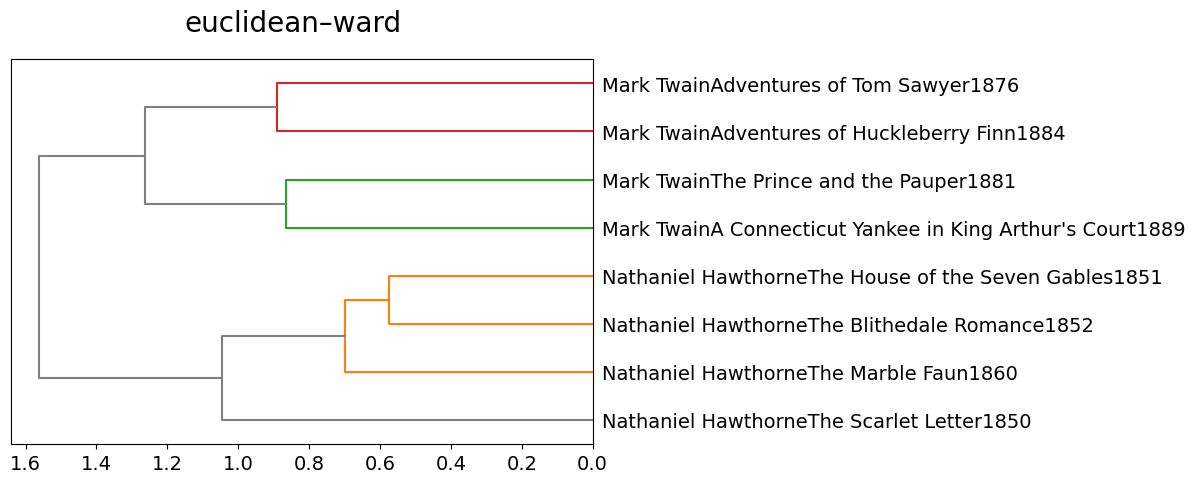

<Figure size 640x480 with 0 Axes>

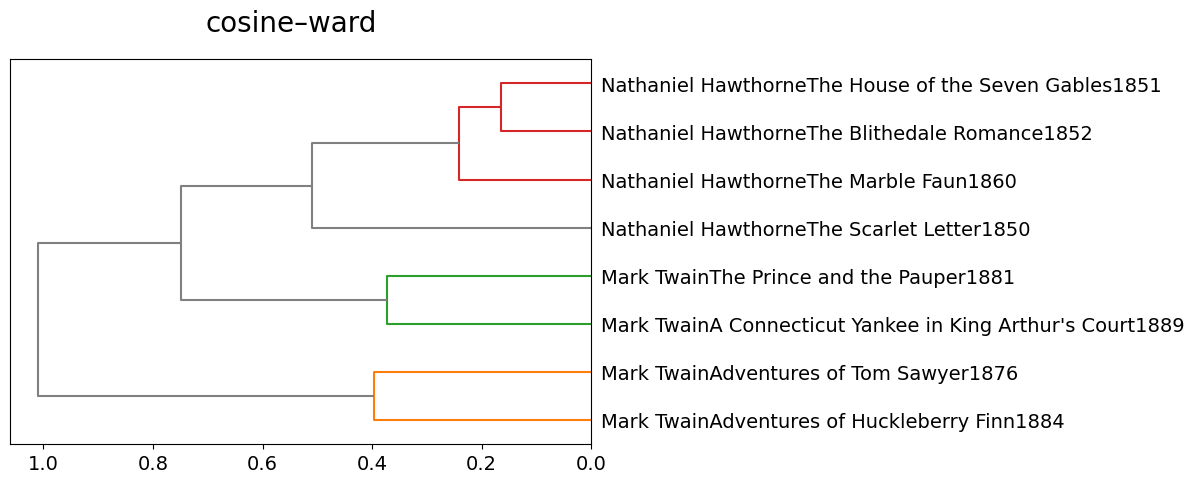

<Figure size 640x480 with 0 Axes>

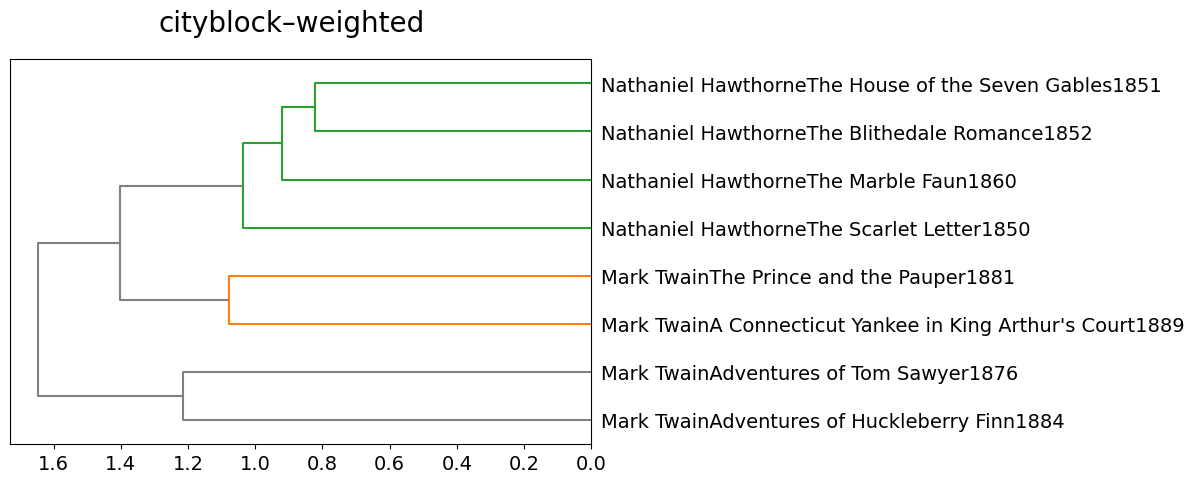

<Figure size 640x480 with 0 Axes>

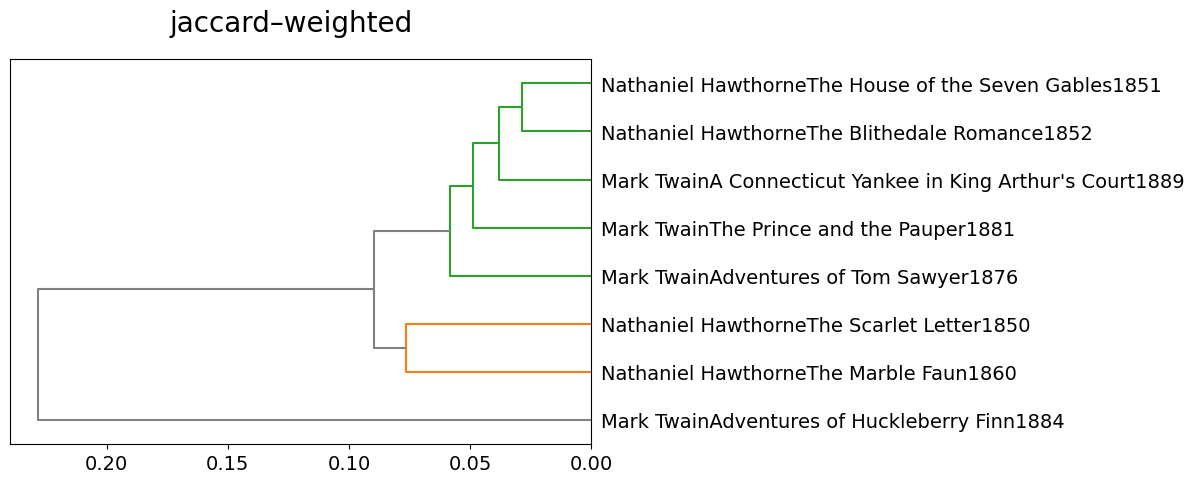

<Figure size 640x480 with 0 Axes>

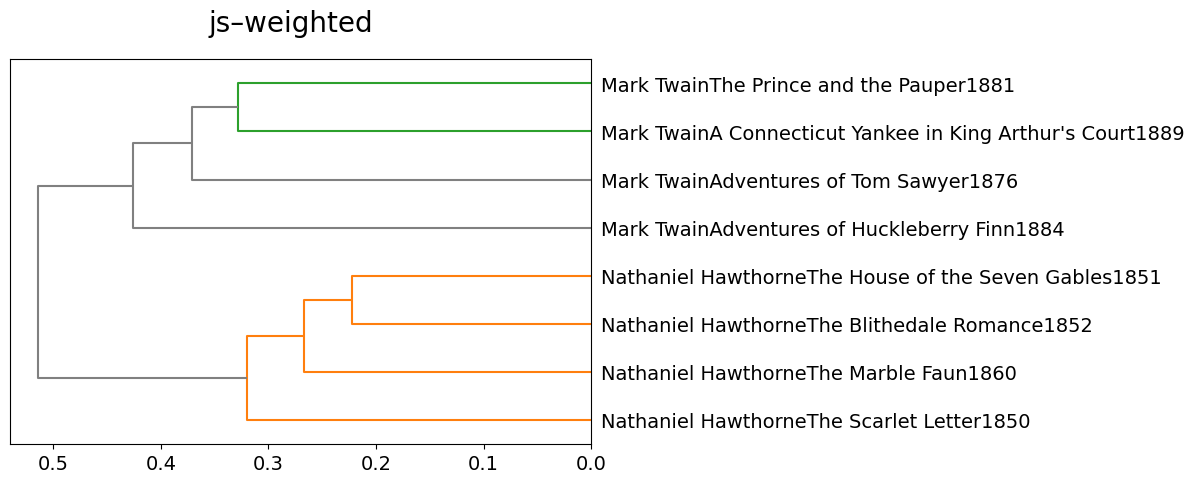

In [119]:
for X, metric, label, linkage in combos:
    draw_hca(PAIRS[label], linkage_method=linkage)

# bar graph of topics by book - hw8

In [120]:
MC.TOPICS['phi_p'] = MC.PHI.T.sum() / MC.PHI.T.sum().sum()


MC.TOPICS['phi_h'] = MC.TOPICS.phi_p * np.log2(1/MC.TOPICS.phi_p)


<Axes: title={'center': 'Topics by Chapter'}, ylabel='label'>

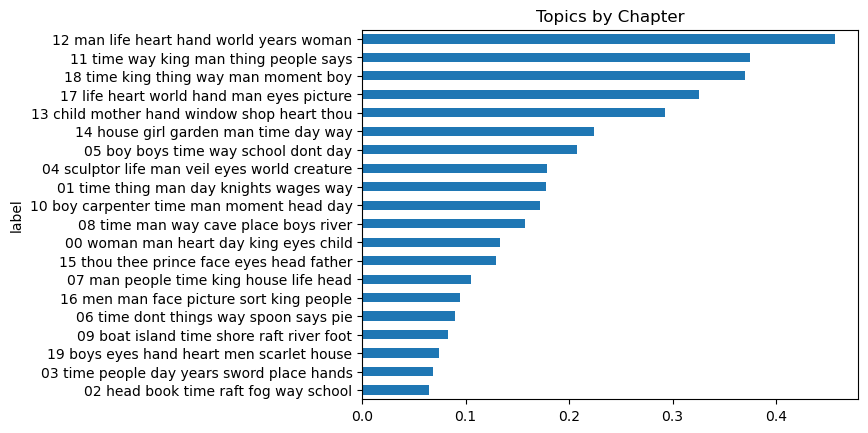

In [121]:
MC.TOPICS.reset_index().set_index('label').phi_h.sort_values().plot.barh(title="Topics by Chapter")

In [122]:
MC.show_dominant_label_topic('author')

author
Mark Twain                18 time king thing way man moment boy
Nathaniel Hawthorne    12 man life heart hand world years woman
Name: topic_id, dtype: object

In [123]:
MC.show_label_comparison_plot('author', 'Mark Twain', 'Nathaniel Hawthorne')

# heatmap of sentiment by author. Two graphs...

In [124]:
import pandas as pd

# Assuming LIB and EMO_BOOKS are your DataFrames
combined_df = pd.merge(EMO_BOOKS, LIB[['label']], left_index=True, right_index=True)
combined_df.set_index('label', inplace=True)


In [125]:
mark = ["Mark TwainA Connecticut Yankee in King Arthur's Court1889",
       'Mark TwainAdventures of Huckleberry Finn1884',
       'Mark TwainAdventures of Tom Sawyer1876',
       'Mark TwainThe Prince and the Pauper1881']

In [126]:
mark_sent = combined_df[combined_df.index.isin(mark)]

In [127]:
hawth_sent = combined_df[~combined_df.index.isin(mark)]

In [128]:
sent_total = pd.concat([mark_sent.mean().to_frame().T,hawth_sent.mean().to_frame().T], ignore_index=True)

In [129]:
sent_total['author'] = ['Mark Twain', 'Nathaniel Hawthorne']

In [130]:
sent_total.set_index('author', inplace= True)
sent_total

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,sentiment
author,,,,,,,,,
Mark Twain,0.271596,0.260217,0.209122,0.338478,0.305348,0.323849,0.17864,0.336860,-0.071761
Nathaniel Hawthorne,0.225293,0.272631,0.185213,0.309041,0.342072,0.311037,0.16636,0.365612,0.035789


<Axes: ylabel='author'>

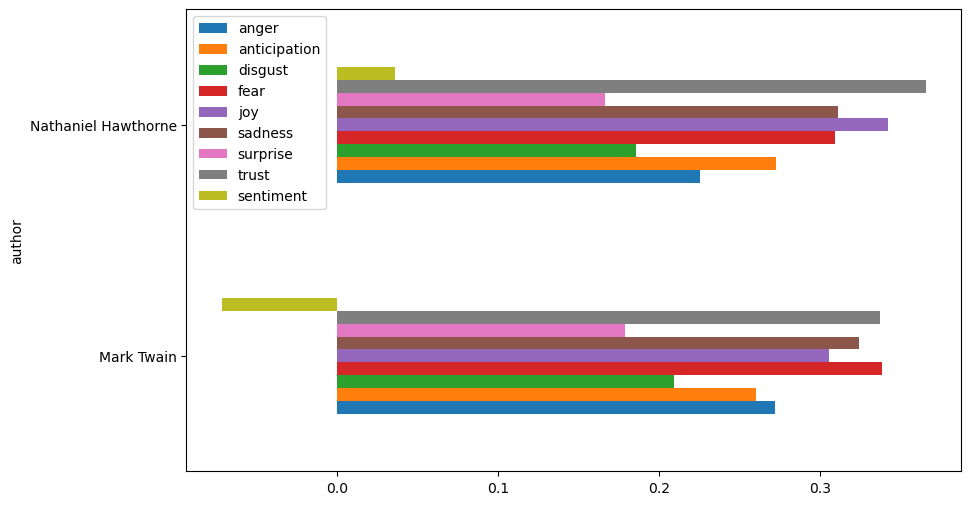

In [131]:
sent_total.plot.barh(figsize=(10,6))